<a href="https://colab.research.google.com/github/eadewusic/Sentiment-Analysis-Group11/blob/main/%5BDeep_Learning_Models%5D_Sentiment_Analysis_Group_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Models Analysis - Group 11**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U numpy gensim --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: smart-open
    Found existing installation: 

In [2]:
!pip install --upgrade --force-reinstall --no-deps kaggle===1.5.8
!mkdir /root/.kaggle

with open("/root/.kaggle/kaggle.json", "w+") as f:
    f.write('{"username": "euniceadewusi", "key":""}')

!chmod 600 /root/.kaggle/kaggle.json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.8-py3-none-any.whl size=73249 sha256=5d042fca3afe47a93cf9ed8e23bb99009f043870c7f57b73ca4c882822a7eac1
  Stored in directory: /root/.cache/pip/wheels/b5/23/bd/d33cbf399584fa44fa049711892d333954a50ed4b86948109e
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.5
    Uninstalling kaggle-1.7.4.5:
      Successfully uninstalled kaggle-1.7.4.5


In [3]:
# Downloading the Dataset

!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis
!mkdir '/content/data'

!unzip -qo 'twitter-entity-sentiment-analysis.zip' -d '/content/data'

  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 99.6MB/s]


In [91]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Embedding, LSTM, Dense, Conv1D, GlobalMaxPooling1D, GRU, InputLayer, Bidirectional, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import l2, l1_l2
import os
from tensorflow.keras.models import load_model
import pickle

In [6]:
train_df = pd.read_csv('/content/data/twitter_training.csv')
test_df = pd.read_csv('/content/data/twitter_validation.csv')

train_df.columns = ['Tweet ID', 'Entity', 'Sentiment', 'Tweet content']
test_df.columns = ['Tweet ID', 'Entity', 'Sentiment', 'Tweet content']

# Explore the training data

In [9]:
# Print first few rows of the dataset to understand its structure
print("Training Data Overview:")
train_df.head(6)

Training Data Overview:


,Tweet ID,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [10]:
# Training Data Info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74681 non-null  int64 
 1   Entity         74681 non-null  object
 2   Sentiment      74681 non-null  object
 3   Tweet content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


74,681 entries is moderately large for NLP tasks

In [11]:
# view dataset columns
train_df.columns

Index(['Tweet ID', 'Entity', 'Sentiment', 'Tweet content'], dtype='object')

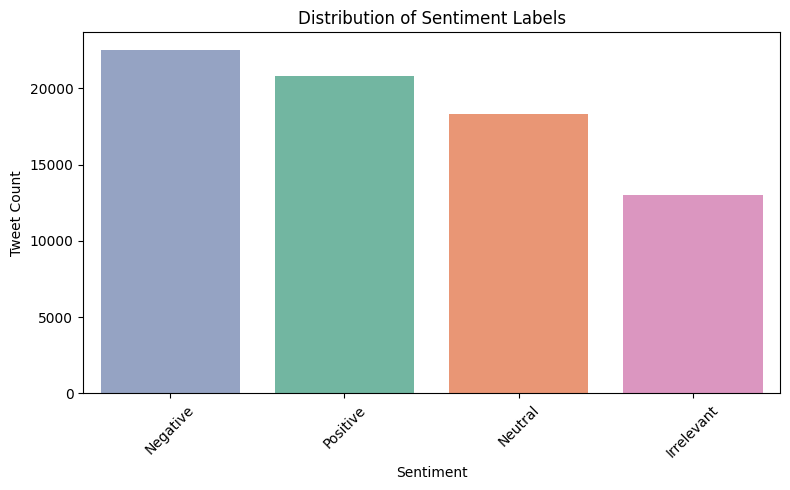

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Sentiment', hue='Sentiment', order=train_df['Sentiment'].value_counts().index, palette='Set2', legend=False)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

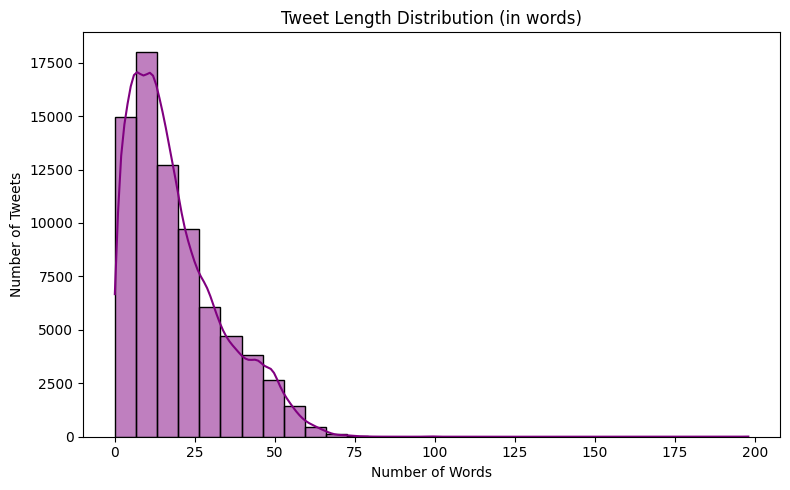

In [17]:
train_df['text_length'] = train_df['Tweet content'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(train_df['text_length'], bins=30, kde=True, color='purple')
plt.title('Tweet Length Distribution (in words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()

In [18]:
# remove the id and the entity
train_df = train_df.drop(columns=['Tweet ID', 'Entity'])
print(train_df.shape)
train_df.head(10)

(74681, 3)


,Sentiment,Tweet content,text_length
0,Positive,I am coming to the borders and I will kill you...,12
1,Positive,im getting on borderlands and i will kill you ...,10
2,Positive,im coming on borderlands and i will murder you...,10
3,Positive,im getting on borderlands 2 and i will murder ...,12
4,Positive,im getting into borderlands and i can murder y...,10
5,Positive,So I spent a few hours making something for fu...,55
6,Positive,So I spent a couple of hours doing something f...,54
7,Positive,So I spent a few hours doing something for fun...,28
8,Positive,So I spent a few hours making something for fu...,55
9,Positive,2010 So I spent a few hours making something f...,56


In [19]:
test_df = test_df.drop(columns=['Tweet ID', 'Entity'])
print(test_df.shape)
test_df.head(10)

(999, 2)


,Sentiment,Tweet content
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
7,Positive,my ass still knee-deep in Assassins Creed Odys...
8,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
9,Positive,The professional dota 2 scene is fucking explo...


## Data Preprocessing

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# 2. Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.strip()

train_df['Tweet content'] = train_df['Tweet content'].fillna('').apply(clean_text)
test_df['Tweet content'] = test_df['Tweet content'].fillna('').apply(clean_text)

# 3. Tokenize for Word2Vec
train_sentences = [text.split() for text in train_df['Tweet content']]
test_sentences = [text.split() for text in test_df['Tweet content']]

# 4. Train Word2Vec (only on train)
w2v_model = Word2Vec(train_sentences, vector_size=100, window=5, min_count=1)

# 5. Tokenizer (only on train)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['Tweet content'])
word_index = tokenizer.word_index

# 6. Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(train_df['Tweet content'])
X_test_seq = tokenizer.texts_to_sequences(test_df['Tweet content'])

# 7. Pad
X_train = pad_sequences(X_train_seq, maxlen=50)
X_test = pad_sequences(X_test_seq, maxlen=50)

# 8. Encode labels
le = LabelEncoder()
y_train = le.fit_transform(train_df['Sentiment'])
y_train = to_categorical(y_train)
y_test = le.transform(test_df['Sentiment'])
y_test = to_categorical(y_test)

# 9. Split training into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [ ]:
embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

## LSTM model + Word2Vec

In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(word_index)+1,
                         output_dim=embedding_dim,
                         weights=[embedding_matrix],
                         input_length=50,
                         trainable=False))
lstm_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     4,074,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,074,700 (15.54 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,074,700 (15.54 MB)

In [ ]:
lstm_history = lstm_model.fit(X_train, y_train,
               epochs=5,
               batch_size=32,
               validation_data=(X_val, y_val))

Epoch 1/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 103s 53ms/step - accuracy: 0.4811 - loss: 1.1944 - val_accuracy: 0.5480 - val_loss: 1.0595
Epoch 2/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 143s 53ms/step - accuracy: 0.5521 - loss: 1.0478 - val_accuracy: 0.5740 - val_loss: 1.0041
Epoch 3/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 141s 53ms/step - accuracy: 0.5778 - loss: 0.9966 - val_accuracy: 0.5976 - val_loss: 0.9633
Epoch 4/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 139s 51ms/step - accuracy: 0.5958 - loss: 0.9589 - val_accuracy: 0.6066 - val_loss: 0.9408
Epoch 5/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 96s 51ms/step - accuracy: 0.6126 - loss: 0.9268 - val_accuracy: 0.6195 - val_loss: 0.9141


In [ ]:
# Predict probabilities
y_pred_prob = lstm_model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Basic metrics
loss, acc = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Advanced metrics
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# Separate scores
f1_lstm = f1_score(y_true, y_pred, average='weighted')
precision_lstm = precision_score(y_true, y_pred, average='weighted')
recall_lstm = recall_score(y_true, y_pred, average='weighted')

print(f"F1 Score: {f1_lstm:.4f}")
print(f"Precision: {precision_lstm:.4f}")
print(f"Recall: {recall_lstm:.4f}")

Test Loss: 0.7889
Test Accuracy: 0.6837
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.63      0.57      0.60       171
    Negative       0.70      0.75      0.73       266
     Neutral       0.69      0.62      0.66       285
    Positive       0.69      0.75      0.72       277

    accuracy                           0.68       999
   macro avg       0.68      0.67      0.67       999
weighted avg       0.68      0.68      0.68       999

F1 Score: 0.6818
Precision: 0.6826
Recall: 0.6837


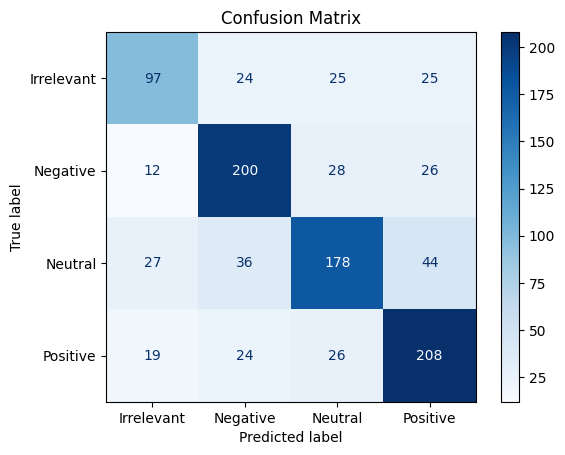

In [ ]:
# 5. Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

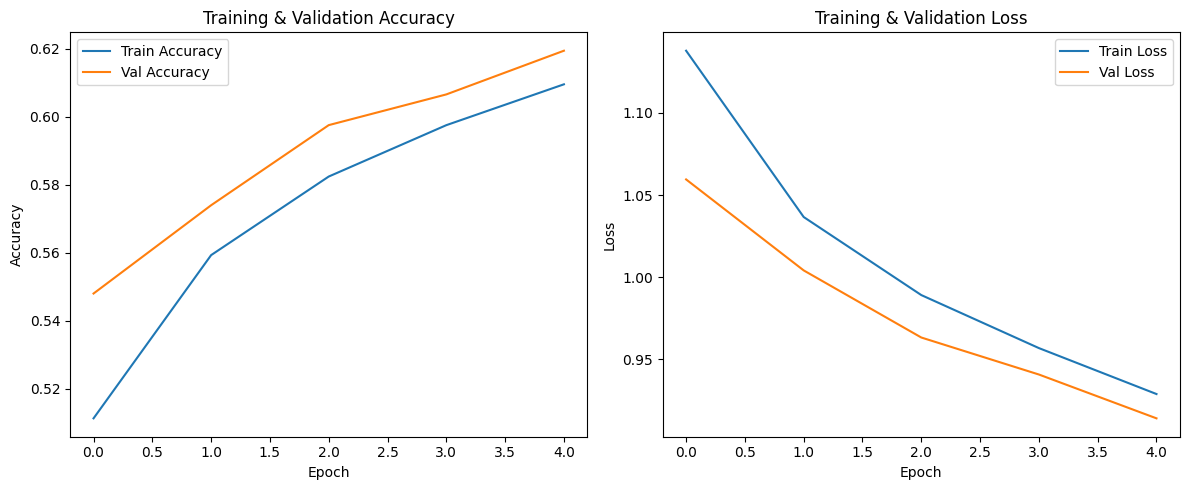

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

## GRU model + Word2Vec

In [ ]:
gru_model = Sequential()
gru_model.add(Embedding(input_dim=len(word_index)+1,
                         output_dim=embedding_dim,
                         weights=[embedding_matrix],
                         input_length=50,
                         trainable=False))
gru_model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
gru_model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
gru_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     4,074,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,074,700 (15.54 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,074,700 (15.54 MB)

In [ ]:
gru_history = gru_model.fit(X_train, y_train,
               epochs=5,
               batch_size=32,
               validation_data=(X_val, y_val))

Epoch 1/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 102s 53ms/step - accuracy: 0.4678 - loss: 1.2155 - val_accuracy: 0.5466 - val_loss: 1.0599
Epoch 2/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 139s 52ms/step - accuracy: 0.5479 - loss: 1.0588 - val_accuracy: 0.5782 - val_loss: 1.0048
Epoch 3/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 94s 51ms/step - accuracy: 0.5755 - loss: 1.0081 - val_accuracy: 0.5891 - val_loss: 0.9804
Epoch 4/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 100s 54ms/step - accuracy: 0.5895 - loss: 0.9815 - val_accuracy: 0.6035 - val_loss: 0.9524
Epoch 5/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 140s 53ms/step - accuracy: 0.5997 - loss: 0.9507 - val_accuracy: 0.6145 - val_loss: 0.9321


In [ ]:
# Predict probabilities
y_pred_prob_gru = gru_model.predict(X_test)

# Convert probabilities to class labels
y_pred_gru = np.argmax(y_pred_prob_gru, axis=1)
y_true_gru = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [ ]:
# Basic metrics
loss, acc = gru_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Advanced metrics
print("Classification Report:")
print(classification_report(y_true_gru, y_pred_gru, target_names=le.classes_))

# Separate scores
f1_gru = f1_score(y_true_gru, y_pred_gru, average='weighted')
precision_gru = precision_score(y_true_gru, y_pred_gru, average='weighted')
recall_gru = recall_score(y_true_gru, y_pred_gru, average='weighted')


print(f"F1 Score: {f1_gru:.4f}")
print(f"Precision: {precision_gru:.4f}")
print(f"Recall: {recall_gru:.4f}")

Test Loss: 0.8361
Test Accuracy: 0.6456
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.65      0.42      0.51       171
    Negative       0.63      0.77      0.70       266
     Neutral       0.67      0.56      0.61       285
    Positive       0.64      0.75      0.69       277

    accuracy                           0.65       999
   macro avg       0.65      0.63      0.63       999
weighted avg       0.65      0.65      0.64       999

F1 Score: 0.6383
Precision: 0.6480
Recall: 0.6456


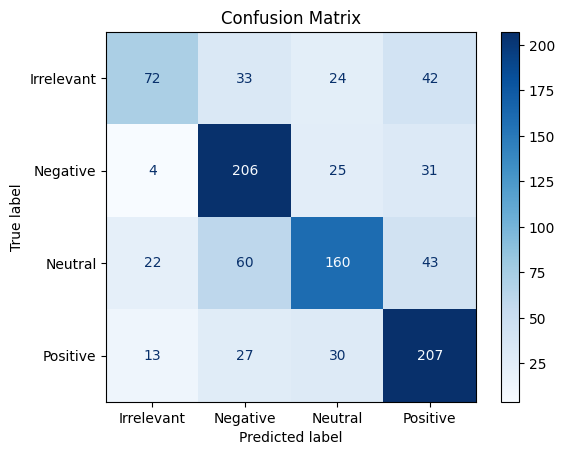

In [ ]:
# 5. Confusion matrix
cm_gru = confusion_matrix(y_true_gru, y_pred_gru)
display = ConfusionMatrixDisplay(confusion_matrix=cm_gru, display_labels=le.classes_)
display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

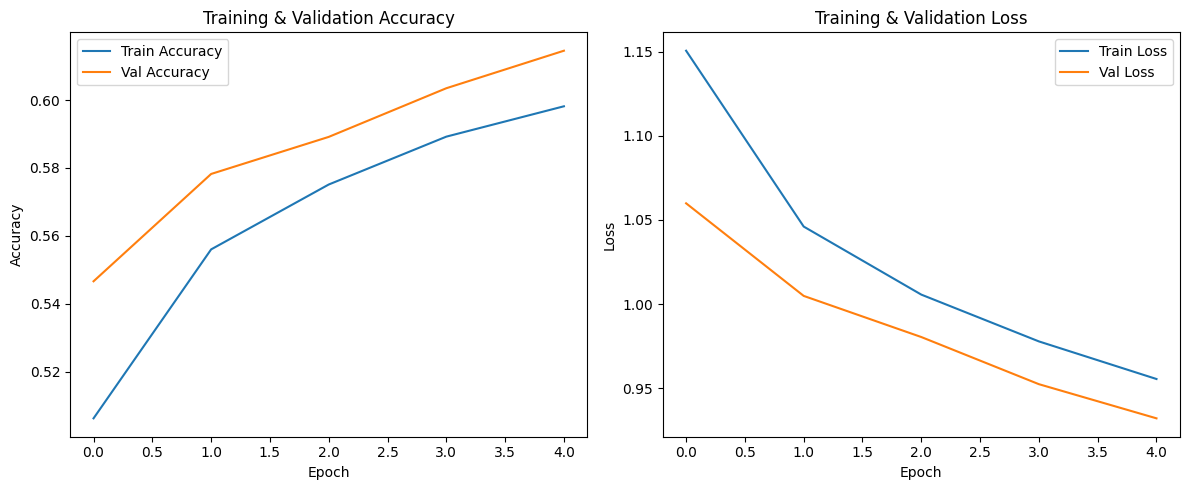

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(gru_history.history['accuracy'], label='Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(gru_history.history['loss'], label='Train Loss')
plt.plot(gru_history.history['val_loss'], label='Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

## CNN model + Word2Vec

In [ ]:
from keras.regularizers import l1_l2
from keras.layers import Dropout ,Flatten

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=len(word_index)+1,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=50,
                        trainable=False))
cnn_model.add(Conv1D(filters=32, kernel_size=5, activation='relu' , kernel_regularizer=l1_l2(0.0001)))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Flatten())
cnn_model.add(Dense(16, activation='relu'))
cnn_model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │     4,074,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,074,700 (15.54 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,074,700 (15.54 MB)

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
cnn_history = cnn_model.fit(X_train, y_train,
              epochs=20,
              batch_size=32,
              validation_data=(X_val, y_val),
              callbacks=[early_stop])

Epoch 1/20
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.4754 - loss: 1.2719 - val_accuracy: 0.5358 - val_loss: 1.1511
Epoch 2/20
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5587 - loss: 1.1129 - val_accuracy: 0.5474 - val_loss: 1.1254
Epoch 3/20
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5825 - loss: 1.0691 - val_accuracy: 0.5646 - val_loss: 1.1107
Epoch 4/20
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6055 - loss: 1.0286 - val_accuracy: 0.5692 - val_loss: 1.1145
Epoch 5/20
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6187 - loss: 1.0101 - val_accuracy: 0.5731 - val_loss: 1.1041
Epoch 6/20
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6312 - loss: 0.9895 - val_accuracy: 0.5897 - val_loss: 1.0773
Epoch 7/20
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.6306 - loss: 0.9851 - val_accuracy: 0.5900 - val_loss: 1.0921
Epoch 8/20
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6415 - loss: 0

In [ ]:
# Predict probabilities
y_pred_prob_cnn = cnn_model.predict(X_test)

# Convert probabilities to class labels
y_pred_cnn = np.argmax(y_pred_prob_cnn, axis=1)
y_true_cnn = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
# Basic metrics
loss, acc = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Advanced metrics
print("Classification Report:")
print(classification_report(y_true_cnn, y_pred_cnn, target_names=le.classes_))

# Separate scores
f1_cnn = f1_score(y_true_cnn, y_pred_cnn, average='weighted')
precision_cnn = precision_score(y_true_cnn, y_pred_cnn, average='weighted')
recall_cnn = recall_score(y_true_cnn, y_pred_cnn, average='weighted')

print(f"F1 Score: {f1_cnn:.4f}")
print(f"Precision: {precision_cnn:.4f}")
print(f"Recall: {recall_cnn:.4f}")

Test Loss: 0.8807
Test Accuracy: 0.6827
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.63      0.46      0.53       171
    Negative       0.71      0.80      0.75       266
     Neutral       0.71      0.61      0.66       285
    Positive       0.65      0.78      0.71       277

    accuracy                           0.68       999
   macro avg       0.68      0.66      0.66       999
weighted avg       0.68      0.68      0.68       999

F1 Score: 0.6765
Precision: 0.6819
Recall: 0.6827


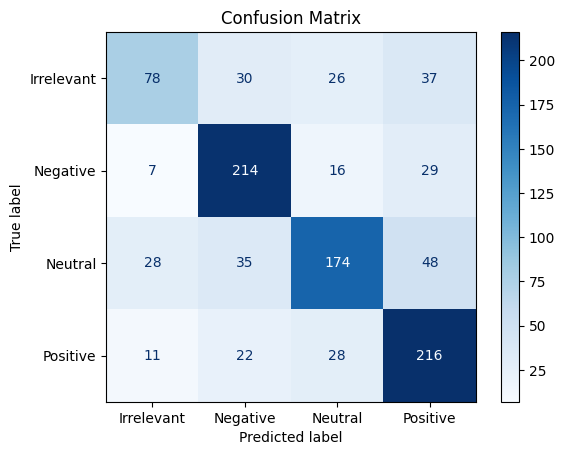

In [ ]:
# 5. Confusion matrix
cmn = confusion_matrix(y_true_cnn, y_pred_cnn)
disps = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=le.classes_)
disps.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

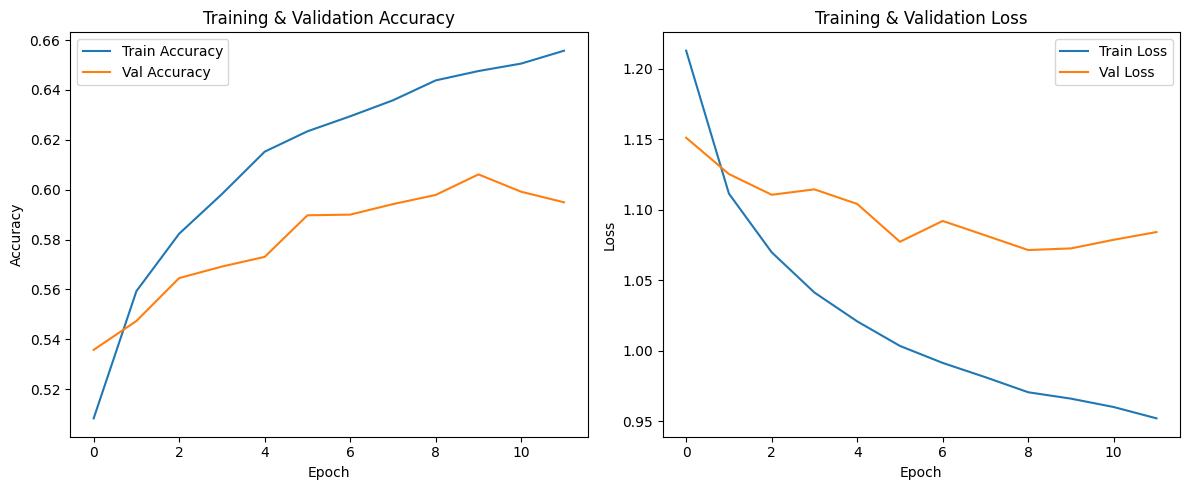

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Trying out pretrained embeddings - GloVe

In [20]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip glove.6B.100d.txt

--2025-06-07 19:52:49--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-07 19:52:49--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-07 19:52:49--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [21]:
# 1. Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.strip()

train_df['Tweet content'] = train_df['Tweet content'].fillna('').apply(clean_text)
test_df['Tweet content'] = test_df['Tweet content'].fillna('').apply(clean_text)

# 2. Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['Tweet content'])
word_index = tokenizer.word_index

# 3. Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(train_df['Tweet content'])
X_test_seq = tokenizer.texts_to_sequences(test_df['Tweet content'])

# 4. Pad sequences
MAX_SEQUENCE_LENGTH = 50
X_train = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

# 5. Encode labels
le = LabelEncoder()
y_train = le.fit_transform(train_df['Sentiment'])
y_train = to_categorical(y_train)
y_test = le.transform(test_df['Sentiment'])
y_test = to_categorical(y_test)

# 6. Load GloVe embeddings (ensure glove.6B.100d.txt is in the same directory)
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# 7. Create embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# 8. Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Refactored LSTM Model + GloVe

In [22]:
embedding_layer = Embedding(
    input_dim=len(word_index) + 1,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    trainable=False  # GloVe weights are frozen
)

In [23]:
print(le.classes_)  # show all unique sentiment classes
print(y_train.shape)

['Irrelevant' 'Negative' 'Neutral' 'Positive']
(59744, 4)


In [77]:
num_classes = y_train.shape[1]

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(word_index) + 1,
                         output_dim=embedding_dim,
                         weights=[embedding_matrix],
                         input_length=MAX_SEQUENCE_LENGTH,
                         trainable=False))  #  use pretrained embeddings as-is since dataset is small

model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(num_classes, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

# Keras to finalize the model architecture
model_lstm.build(input_shape=(None, MAX_SEQUENCE_LENGTH))

model_lstm.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ (None, 50, 100)        │     4,074,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,192,464 (15.99 MB)

 Trainable params: 117,764 (460.02 KB)

 Non-trainable params: 4,074,700 (15.54 MB)

In [79]:
# Train model
history_lstm = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=64,
    verbose=1
)

Epoch 1/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 134s 143ms/step - accuracy: 0.4586 - loss: 1.2339 - val_accuracy: 0.5490 - val_loss: 1.0836
Epoch 2/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 141s 142ms/step - accuracy: 0.5403 - loss: 1.0930 - val_accuracy: 0.5812 - val_loss: 1.0104
Epoch 3/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 142s 142ms/step - accuracy: 0.5825 - loss: 1.0087 - val_accuracy: 0.6061 - val_loss: 0.9520
Epoch 4/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 141s 141ms/step - accuracy: 0.6147 - loss: 0.9393 - val_accuracy: 0.6274 - val_loss: 0.9083
Epoch 5/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 142s 142ms/step - accuracy: 0.6417 - loss: 0.8727 - val_accuracy: 0.6543 - val_loss: 0.8501
Epoch 6/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 142s 141ms/step - accuracy: 0.6667 - loss: 0.8234 - val_accuracy: 0.6742 - val_loss: 0.8038
Epoch 7/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 142s 141ms/step - accuracy: 0.6864 - loss: 0.7824 - val_accuracy: 0.6882 - val_loss: 0.7677
Epoch 8/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 142s 142ms/step - accuracy: 0.7088 -

In [80]:
# Predict probabilities
y_pred_prob = model_lstm.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


Test Loss: 0.3419
Test Accuracy: 0.8949
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.85      0.87      0.86       171
    Negative       0.90      0.94      0.92       266
     Neutral       0.91      0.84      0.87       285
    Positive       0.91      0.92      0.92       277

    accuracy                           0.89       999
   macro avg       0.89      0.89      0.89       999
weighted avg       0.90      0.89      0.89       999

F1 Score: 0.8945
Precision: 0.8953
Recall: 0.8949


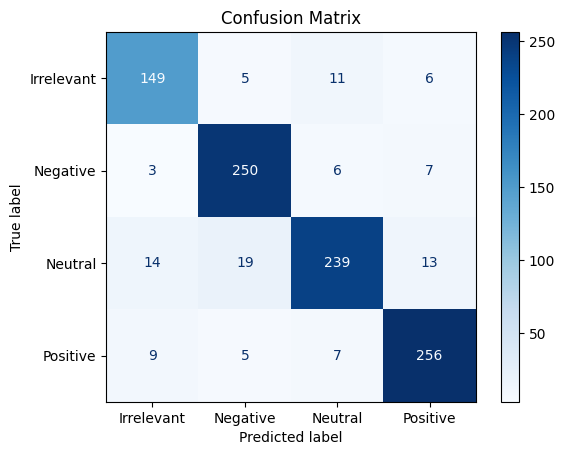

In [81]:
# Basic metrics
loss, acc = model_lstm.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Advanced metrics
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# Separate scores
f1_lstm = f1_score(y_true, y_pred, average='weighted')
precision_lstm = precision_score(y_true, y_pred, average='weighted')
recall_lstm = recall_score(y_true, y_pred, average='weighted')

print(f"F1 Score: {f1_lstm:.4f}")
print(f"Precision: {precision_lstm:.4f}")
print(f"Recall: {recall_lstm:.4f}")

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

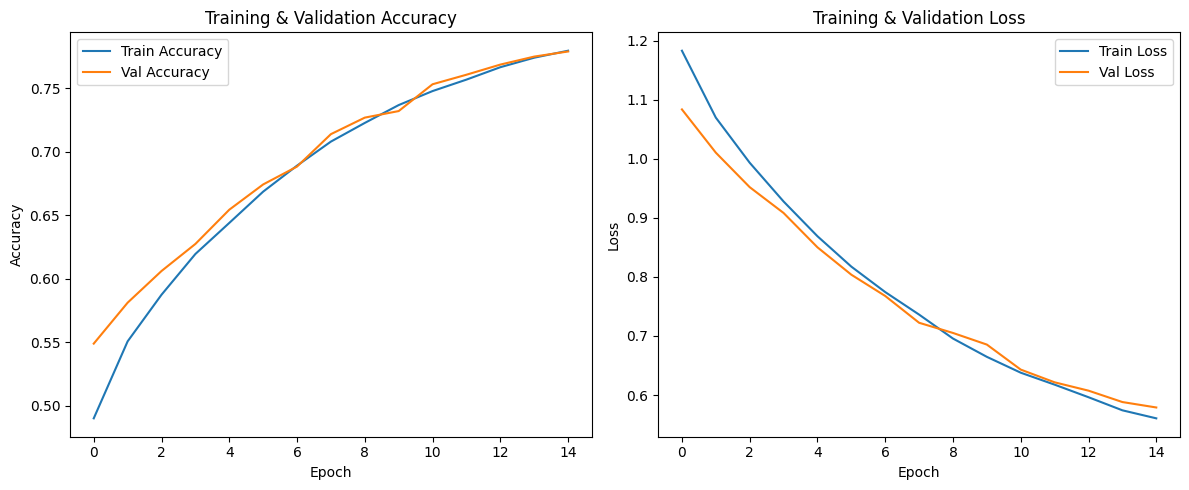

In [82]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Val Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Bidirectional LSTM + GloVe

In [37]:
model_bilstm = Sequential()
model_bilstm.add(Embedding(input_dim=len(word_index)+1,
                          output_dim=embedding_dim,
                          weights=[embedding_matrix],
                          trainable=False))
model_bilstm.add(Bidirectional(LSTM(64, return_sequences=False)))
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Dense(32, activation='relu'))
model_bilstm.add(Dense(num_classes, activation='softmax'))

model_bilstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Build model with input shape (batch_size=None, sequence_length)
model_bilstm.build(input_shape=(None, X_train.shape[1]))

model_bilstm.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 50, 100)        │     4,074,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,163,440 (15.88 MB)

 Trainable params: 88,740 (346.64 KB)

 Non-trainable params: 4,074,700 (15.54 MB)

In [38]:
# Train model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_bilstm = model_bilstm.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=64,
                    callbacks=[early_stop])

Epoch 1/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.4297 - loss: 1.2681 - val_accuracy: 0.5300 - val_loss: 1.1171
Epoch 2/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 78s 89ms/step - accuracy: 0.5324 - loss: 1.1130 - val_accuracy: 0.5533 - val_loss: 1.0545
Epoch 3/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 70s 93ms/step - accuracy: 0.5648 - loss: 1.0413 - val_accuracy: 0.5820 - val_loss: 0.9956
Epoch 4/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 69s 93ms/step - accuracy: 0.5967 - loss: 0.9789 - val_accuracy: 0.6046 - val_loss: 0.9511
Epoch 5/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 73s 98ms/step - accuracy: 0.6227 - loss: 0.9197 - val_accuracy: 0.6269 - val_loss: 0.9027
Epoch 6/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.6630 - loss: 0.8496 - val_accuracy: 0.6261 - val_loss: 0.8978
Epoch 7/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 83s 111ms/step - accuracy: 0.6842 - loss: 0.7877 - val_accuracy: 0.6666 - val_loss: 0.8327
Epoch 8/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 142s 111ms/step - accuracy: 0.7127 - loss: 0.7289

In [39]:
# Predict probabilities
y_pred_prob_bilstm = model_bilstm.predict(X_test)

# Convert probabilities to class labels
y_pred_bilstm = np.argmax(y_pred_prob_bilstm, axis=1)
y_true_bilstm = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


Test Loss: 0.5286
Test Accuracy: 0.8058
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.80      0.84      0.82       171
    Negative       0.76      0.88      0.82       266
     Neutral       0.89      0.66      0.76       285
    Positive       0.79      0.86      0.82       277

    accuracy                           0.81       999
   macro avg       0.81      0.81      0.81       999
weighted avg       0.81      0.81      0.80       999

Bi-lstm F1 Score: 0.8036
Bi-lstm Precision: 0.8142
Bi-lstm Recall: 0.8058


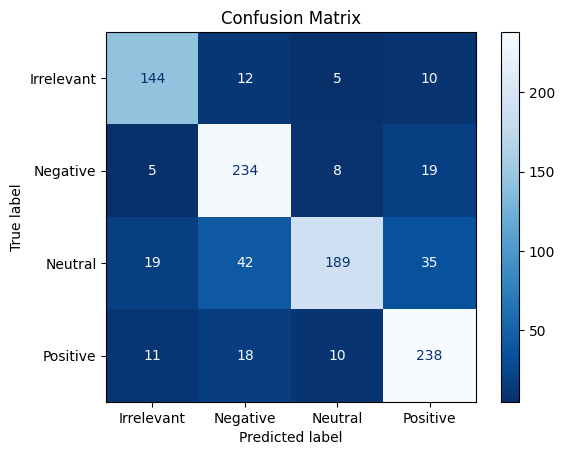

In [42]:
# Basic metrics
loss, acc = model_bilstm.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Advanced metrics
print("Classification Report:")
print(classification_report(y_true_bilstm, y_pred_bilstm, target_names=le.classes_))

# Separate scores
f1_bilstm = f1_score(y_true_bilstm, y_pred_bilstm, average='weighted')
precision_bilstm = precision_score(y_true_bilstm, y_pred_bilstm, average='weighted')
recall_bilstm = recall_score(y_true_bilstm, y_pred_bilstm, average='weighted')

print(f"Bi-lstm F1 Score: {f1_bilstm:.4f}")
print(f"Bi-lstm Precision: {precision_bilstm:.4f}")
print(f"Bi-lstm Recall: {recall_bilstm:.4f}")

# Plot confusion matrix
cmb = confusion_matrix(y_true_bilstm, y_pred_bilstm)
disps = ConfusionMatrixDisplay(confusion_matrix=cmb, display_labels=le.classes_)
disps.plot(cmap='Blues_r')
plt.title("Confusion Matrix")
plt.show()

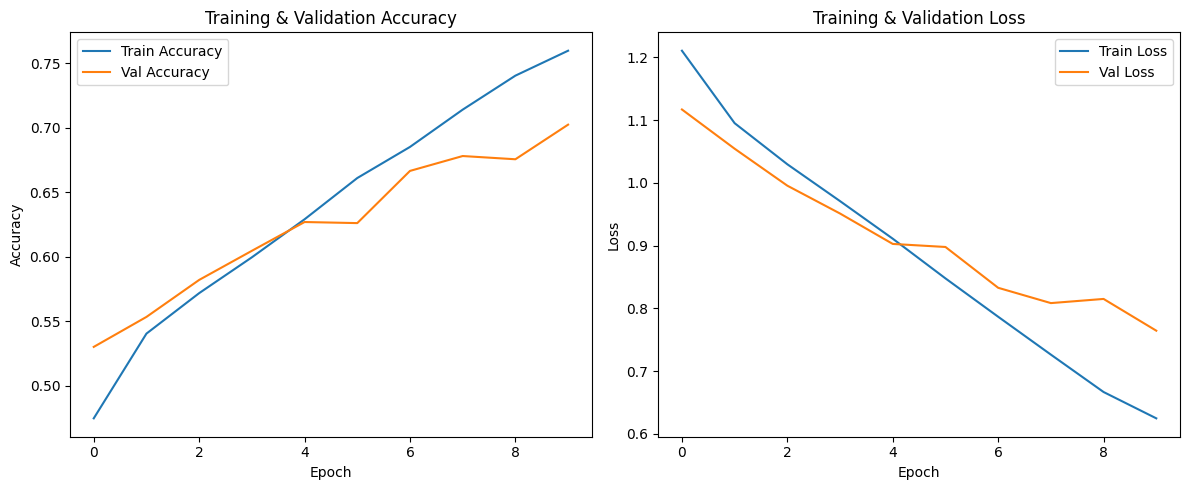

In [43]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label='Val Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['loss'], label='Train Loss')
plt.plot(history_bilstm.history['val_loss'], label='Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Bi-LSTM + Attention + GloVe

In [45]:
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="random_normal", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros", trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        # x shape: (batch_size, time_steps, hidden_size)
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        e = tf.keras.backend.squeeze(e, axis=-1)
        alpha = tf.keras.backend.softmax(e)
        alpha = tf.keras.backend.expand_dims(alpha, axis=-1)
        context = x * alpha
        context = tf.keras.backend.sum(context, axis=1)
        return context

In [49]:
model_bilstm_attention = Sequential()
model_bilstm_attention.add(InputLayer(shape=(X_train.shape[1],)))
model_bilstm_attention.add(Embedding(input_dim=len(word_index)+1,
                                     output_dim=embedding_dim,
                                     weights=[embedding_matrix],
                                     trainable=False))
model_bilstm_attention.add(Bidirectional(LSTM(64, return_sequences=True)))  # return_sequences=True for attention
model_bilstm_attention.add(Attention())
model_bilstm_attention.add(Dropout(0.5))
model_bilstm_attention.add(Dense(32, activation='relu'))
model_bilstm_attention.add(Dense(num_classes, activation='softmax'))

model_bilstm_attention.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_bilstm_attention.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 50, 100)        │     4,074,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 50, 128)        │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_1 (Attention)         │ (None, 128)            │           178 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,163,618 (15.88 MB)

 Trainable params: 88,918 (347.34 KB)

 Non-trainable params: 4,074,700 (15.54 MB)

In [50]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_bilstm_attention = model_bilstm_attention.fit(X_train, y_train,
                                validation_split=0.2,
                                epochs=10,
                                batch_size=64,
                                callbacks=[early_stop])

Epoch 1/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.4297 - loss: 1.2678 - val_accuracy: 0.5344 - val_loss: 1.1114
Epoch 2/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.5466 - loss: 1.0937 - val_accuracy: 0.5565 - val_loss: 1.0587
Epoch 3/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 85s 106ms/step - accuracy: 0.5792 - loss: 1.0283 - val_accuracy: 0.5832 - val_loss: 1.0073
Epoch 4/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 77s 103ms/step - accuracy: 0.6056 - loss: 0.9695 - val_accuracy: 0.5989 - val_loss: 0.9622
Epoch 5/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.6339 - loss: 0.9070 - val_accuracy: 0.6212 - val_loss: 0.9338
Epoch 6/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 98s 132ms/step - accuracy: 0.6622 - loss: 0.8462 - val_accuracy: 0.6401 - val_loss: 0.8929
Epoch 7/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 177s 178ms/step - accuracy: 0.6823 - loss: 0.7980 - val_accuracy: 0.6519 - val_loss: 0.8539
Epoch 8/10
747/747 ━━━━━━━━━━━━━━━━━━━━ 100s 122ms/step - accuracy: 0.7098 - loss:

In [51]:
# Predict probabilities
y_pred_prob_bilstm_attention = model_bilstm_attention.predict(X_test)

# Convert probabilities to class labels
y_pred_bilstm_attention = np.argmax(y_pred_prob_bilstm_attention, axis=1)
y_true_bilstm_attention = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


Test Loss: 0.5480
Test Accuracy: 0.8118
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.81      0.73      0.77       171
    Negative       0.80      0.87      0.83       266
     Neutral       0.85      0.74      0.79       285
    Positive       0.79      0.88      0.84       277

    accuracy                           0.81       999
   macro avg       0.81      0.81      0.81       999
weighted avg       0.81      0.81      0.81       999

Bi-lstm_attention F1 Score: 0.8104
Bi-lstm_attention Precision: 0.8140
Bi-lstm_attention Recall: 0.8118


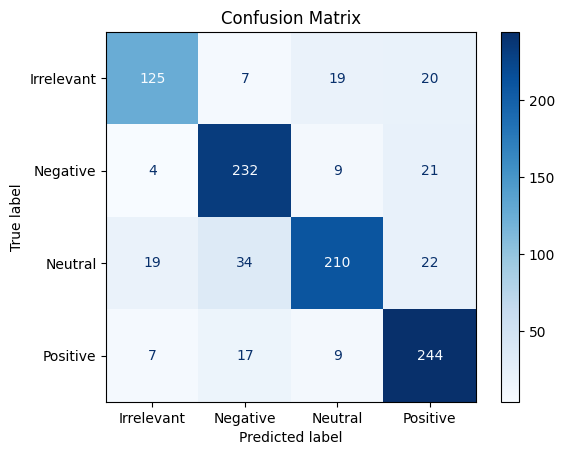

In [54]:
# Basic metrics
loss, acc = model_bilstm_attention.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Advanced metrics
print("Classification Report:")
print(classification_report(y_true_bilstm_attention, y_pred_bilstm_attention, target_names=le.classes_))

# Separate scores
f1_bilstm_attention = f1_score(y_true_bilstm_attention, y_pred_bilstm_attention, average='weighted')
precision_bilstm_attention = precision_score(y_true_bilstm_attention, y_pred_bilstm_attention, average='weighted')
recall_bilstm_attention = recall_score(y_true_bilstm_attention, y_pred_bilstm_attention, average='weighted')

print(f"Bi-lstm_attention F1 Score: {f1_bilstm_attention:.4f}")
print(f"Bi-lstm_attention Precision: {precision_bilstm_attention:.4f}")
print(f"Bi-lstm_attention Recall: {recall_bilstm_attention:.4f}")

# Plot confusion matrix
cmba = confusion_matrix(y_true_bilstm_attention, y_pred_bilstm_attention)
disps = ConfusionMatrixDisplay(confusion_matrix=cmba, display_labels=le.classes_)
disps.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

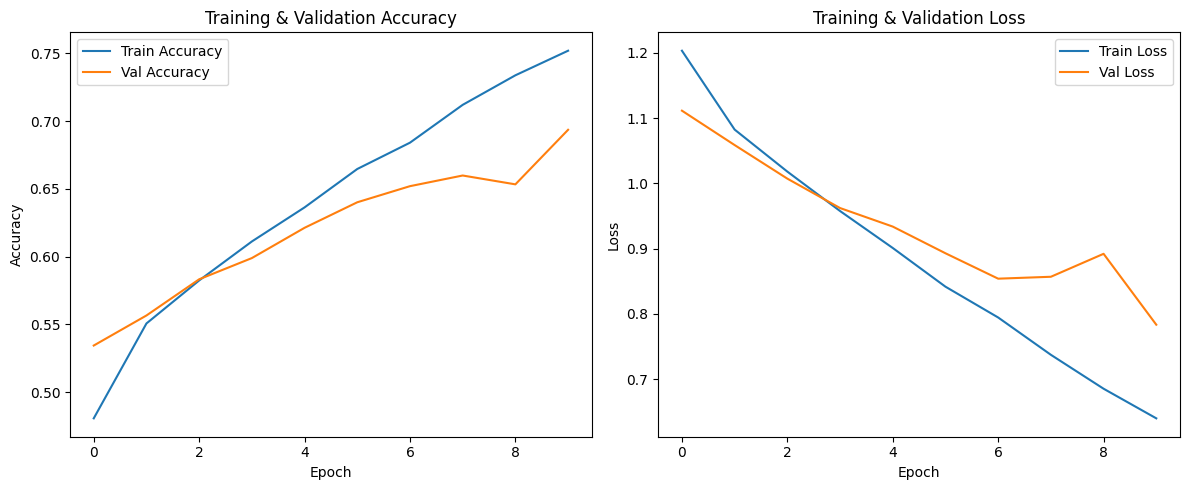

In [55]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bilstm_attention.history['accuracy'], label='Train Accuracy')
plt.plot(history_bilstm_attention.history['val_accuracy'], label='Val Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_bilstm_attention.history['loss'], label='Train Loss')
plt.plot(history_bilstm_attention.history['val_loss'], label='Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Refactored GRU Model + GloVe

In [63]:
model_gru = Sequential()

# 1. Embedding layer with GloVe (non-trainable)
model_gru.add(Embedding(input_dim=len(word_index) + 1,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=MAX_SEQUENCE_LENGTH,
                        trainable=False))

# 2. GRU Layer with dropout
model_gru.add(GRU(64,
                  dropout=0.3,
                  recurrent_dropout=0.2,
                  kernel_regularizer=l2(1e-4)))

# 3. Dropout Layer (added separately for clarity)
model_gru.add(Dropout(0.3))

model_gru.add(Dense(num_classes, activation='softmax')) # Output Layer

model_gru.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Keras to finalize the model architecture
model_gru.build(input_shape=(None, MAX_SEQUENCE_LENGTH))

model_gru.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 50, 100)        │     4,074,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 64)             │        31,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,106,832 (15.67 MB)

 Trainable params: 32,132 (125.52 KB)

 Non-trainable params: 4,074,700 (15.54 MB)

In [64]:
# Add EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_gru = model_gru.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 73s 74ms/step - accuracy: 0.4012 - loss: 1.3221 - val_accuracy: 0.5063 - val_loss: 1.1602
Epoch 2/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 78s 70ms/step - accuracy: 0.5041 - loss: 1.1774 - val_accuracy: 0.5551 - val_loss: 1.0896
Epoch 3/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 64s 69ms/step - accuracy: 0.5227 - loss: 1.1352 - val_accuracy: 0.5702 - val_loss: 1.0603
Epoch 4/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.5463 - loss: 1.1007 - val_accuracy: 0.5769 - val_loss: 1.0363
Epoch 5/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 97s 85ms/step - accuracy: 0.5516 - loss: 1.0882 - val_accuracy: 0.5806 - val_loss: 1.0260
Epoch 6/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 79s 82ms/step - accuracy: 0.5624 - loss: 1.0657 - val_accuracy: 0.5922 - val_loss: 1.0102
Epoch 7/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 88s 94ms/step - accuracy: 0.5727 - loss: 1.0566 - val_accuracy: 0.5968 - val_loss: 0.9974
Epoch 8/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 144s 97ms/step - accuracy: 0.5788 - loss: 1.0431 -

In [65]:
# Predict probabilities
y_pred_prob_gru = model_gru.predict(X_test)

# Convert probabilities to class labels
y_pred_gru = np.argmax(y_pred_prob_gru, axis=1)
y_true_gru = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


Test Loss: 0.8319
Test Accuracy: 0.6967
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.66      0.60      0.63       171
    Negative       0.66      0.82      0.73       266
     Neutral       0.75      0.57      0.65       285
    Positive       0.71      0.77      0.74       277

    accuracy                           0.70       999
   macro avg       0.70      0.69      0.69       999
weighted avg       0.70      0.70      0.69       999

F1 Score: 0.6929
Precision: 0.7016
Recall: 0.6967


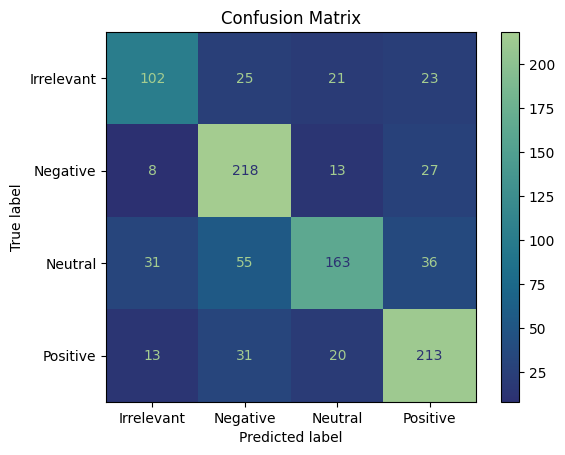

In [66]:
# Basic metrics
loss, acc = model_gru.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Advanced metrics
print("Classification Report:")
print(classification_report(y_true_gru, y_pred_gru, target_names=le.classes_))

# Separate scores
f1_gru = f1_score(y_true_gru, y_pred_gru, average='weighted')
precision_gru = precision_score(y_true_gru, y_pred_gru, average='weighted')
recall_gru = recall_score(y_true_gru, y_pred_gru, average='weighted')

print(f"F1 Score: {f1_gru:.4f}")
print(f"Precision: {precision_gru:.4f}")
print(f"Recall: {recall_gru:.4f}")

# Plot confusion matrix
cmg = confusion_matrix(y_true_gru, y_pred_gru)
disps = ConfusionMatrixDisplay(confusion_matrix=cmg, display_labels=le.classes_)
disps.plot(cmap='crest_r')
plt.title("Confusion Matrix")
plt.show()

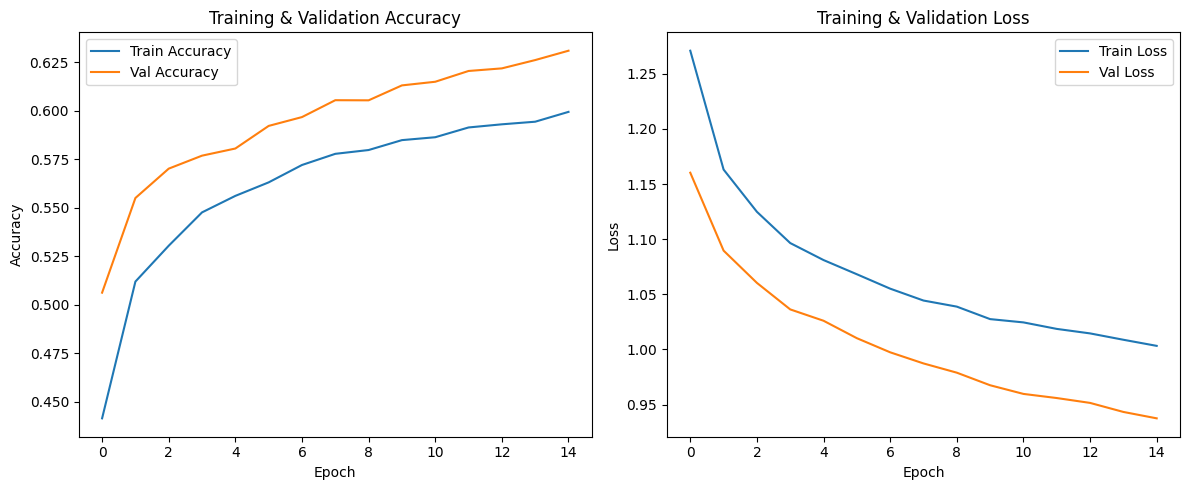

In [67]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Val Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Refactored CNN Model + GloVe

In [71]:
model_cnn = Sequential()

# 1. GloVe embedding layer (non-trainable)
model_cnn.add(Embedding(input_dim=len(word_index)+1,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=MAX_SEQUENCE_LENGTH,
                        trainable=False))

# 2. Convolutional layer with more filters
model_cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l1_l2(1e-4)))

# 3. Global max pooling
model_cnn.add(GlobalMaxPooling1D())

# 4. Fully connected layers with dropout
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(num_classes, activation='softmax'))

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras to finalize the model architecture
model_cnn.build(input_shape=(None, MAX_SEQUENCE_LENGTH))

model_cnn.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, 50, 100)        │     4,074,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 48, 128)        │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,121,744 (15.72 MB)

 Trainable params: 47,044 (183.77 KB)

 Non-trainable params: 4,074,700 (15.54 MB)

In [72]:
# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_cnn = model_cnn.fit(X_train, y_train,
                            validation_data=(X_val, y_val),
                            epochs=15,
                            batch_size=64,
                            callbacks=[early_stop],
                            verbose=1
)

Epoch 1/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.4042 - loss: 1.4600 - val_accuracy: 0.5458 - val_loss: 1.2292
Epoch 2/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.5319 - loss: 1.2412 - val_accuracy: 0.5782 - val_loss: 1.1595
Epoch 3/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.5615 - loss: 1.1743 - val_accuracy: 0.5948 - val_loss: 1.1263
Epoch 4/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.5776 - loss: 1.1454 - val_accuracy: 0.6051 - val_loss: 1.0999
Epoch 5/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.5861 - loss: 1.1252 - val_accuracy: 0.6188 - val_loss: 1.0756
Epoch 6/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.6055 - loss: 1.0992 - val_accuracy: 0.6267 - val_loss: 1.0647
Epoch 7/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.6086 - loss: 1.0912 - val_accuracy: 0.6314 - val_loss: 1.0609
Epoch 8/15
934/934 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.6193 - loss: 1.0739 - 

In [73]:
# Predict probabilities
y_pred_prob_cnn = model_cnn.predict(X_test)

# Convert probabilities to class labels
y_pred_cnn = np.argmax(y_pred_prob_cnn, axis=1)
y_true_cnn = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Test Loss: 0.8313
Test Accuracy: 0.7688
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.75      0.70      0.72       171
    Negative       0.76      0.86      0.81       266
     Neutral       0.81      0.65      0.72       285
    Positive       0.75      0.84      0.80       277

    accuracy                           0.77       999
   macro avg       0.77      0.76      0.76       999
weighted avg       0.77      0.77      0.77       999

F1 Score: 0.7661
Precision: 0.7718
Recall: 0.7688


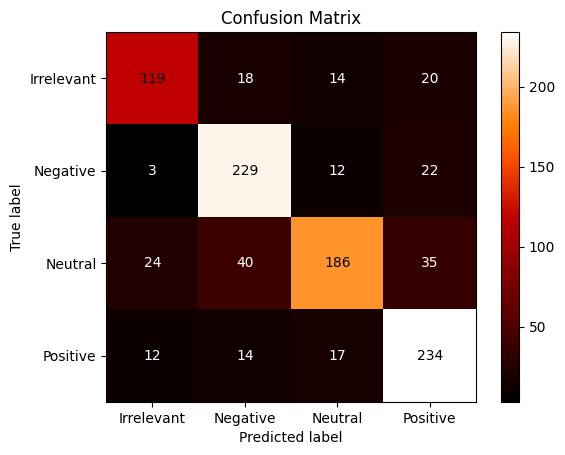

In [74]:
# Basic metrics
loss, acc = model_cnn.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Advanced metrics
print("Classification Report:")
print(classification_report(y_true_cnn, y_pred_cnn, target_names=le.classes_))

# Separate scores
f1_cnn = f1_score(y_true_cnn, y_pred_cnn, average='weighted')
precision_cnn = precision_score(y_true_cnn, y_pred_cnn, average='weighted')
recall_cnn = recall_score(y_true_cnn, y_pred_cnn, average='weighted')

print(f"F1 Score: {f1_cnn:.4f}")
print(f"Precision: {precision_cnn:.4f}")
print(f"Recall: {recall_cnn:.4f}")

# Plot confusion matrix
cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)
disps = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=le.classes_)
disps.plot(cmap='gist_heat')
plt.title("Confusion Matrix")
plt.show()

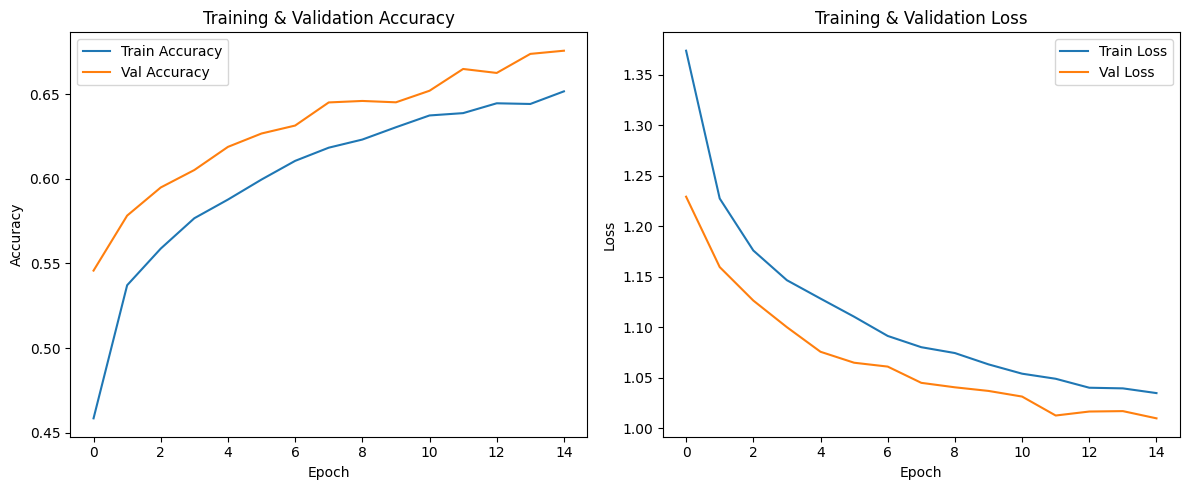

In [75]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

**LSTM + GloVe clearly stands out as the best model overall**. It has the:

- Highest test accuracy: 0.8949 (much better than others, which are mostly below 0.82)
- Lowest test loss: 0.3419 (indicating strong generalization)
- Strongest F1 score: 0.8945 (good balance between precision and recall)
- Balanced precision (0.8953) and recall (0.8949): meaning it performs well at correctly identifying both positive and negative cases
- Stable training and validation accuracy (77.69% and 77.87%) with a reasonable loss; showing good learning without severe overfitting

Other models like CNN and BiLSTM variants perform well on training/validation but have significantly lower test accuracy and F1, indicating they might overfit or generalize less well.

# Save Best Model

In [90]:
# Create directory if it doesn't exist
os.makedirs('saved_models', exist_ok=True)

# Save the best model to a file
model_lstm.save("saved_models/lstm_glove_model.keras")

print("Best Deep Learning Model (LSTM + GloVe model) is saved successfully.\nSaved models:", os.listdir("saved_models"))

Best Deep Learning Model (LSTM + GloVe model) is saved successfully.
Saved models: ['lstm_glove_model.keras']


In [92]:
# Save tokenizer

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("Tokenizer saved successfully.")

Tokenizer saved successfully.
